In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

2024-02-28 05:24:42.574889: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 05:24:43.552934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 05:24:43.552980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 05:24:43.629888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 05:24:43.724824: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 05:24:43.725778: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/home/codespace/.python/current/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

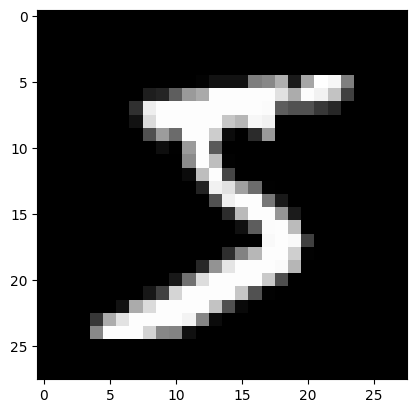

In [6]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

<Axes: >

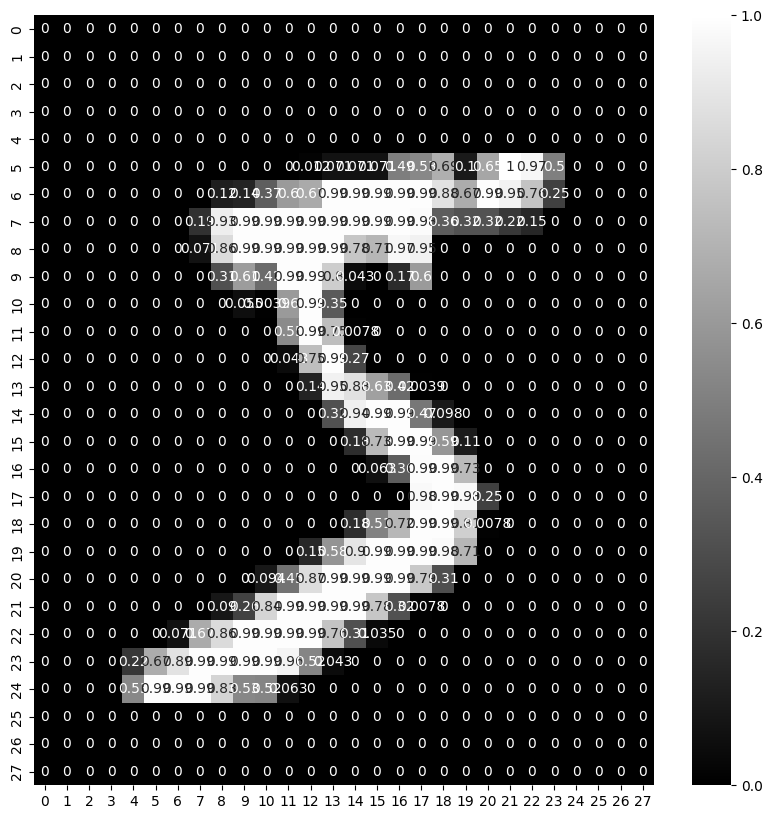

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(x_train[0],annot=True, cmap='gray')

In [10]:
import tensorflow as tf

In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [14]:
### Creating a new ANN
layers = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name ="input_layer"),
    tf.keras.layers.Dense(128, activation = "relu" , name ="hidden_layer1", kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.Dense(100, activation = "relu" , name ="hidden_layer2"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax") 
]

model_clf = tf.keras.Sequential(layers)

In [22]:
### Method _2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

### Defining the model
Model  = Sequential()
Model.add(Flatten(input_shape=(28, 28), name ="input_layer"))
Model.add(Dense(128, activation="relu", name ="hidden_layer1", kernel_regularizer=regularizers.l2(1e-4)))
Model.add(Dropout(0.2))
Model.add(Dense(128, activation="relu", name ="hidden_layer_2", kernel_regularizer=regularizers.L1(1e-4)))
Model.add(Dropout(0.2))
Model.add(Dense(units=32,activation="relu" , name ="hidden_layer2" , kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
Model.add(Dropout(0.2))
Model.add(Dense(10,activation="softmax"))

In [23]:
Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 128)               100480    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 32)                4128      
                                                                 
 dropout_13 (Dropout)        (None, 32)               

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

Model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [25]:
###Traning the model

epochs = 10
validation_set = (x_val, y_val)

In [26]:
history = Model.fit(x_train, y_train, epochs=epochs, validation_data=validation_set)

Epoch 1/10


2024-02-28 06:15:02.063703: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 5s 3ms/step - loss: 0.5628 - accuracy: 0.8719 - val_loss: 0.2633 - val_accuracy: 0.9606
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3202 - accuracy: 0.9435 - val_loss: 0.2283 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9547 - val_loss: 0.2119 - val_accuracy: 0.9688
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2489 - accuracy: 0.9596 - val_loss: 0.1974 - val_accuracy: 0.9726
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2339 - accuracy: 0.9635 - val_loss: 0.1925 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2280 - accuracy: 0.9644 - val_loss: 0.1914 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2233 - accuracy: 0.9663 - val_loss: 0.1951 - val_accuracy: 0.9744
Epo

<Axes: >

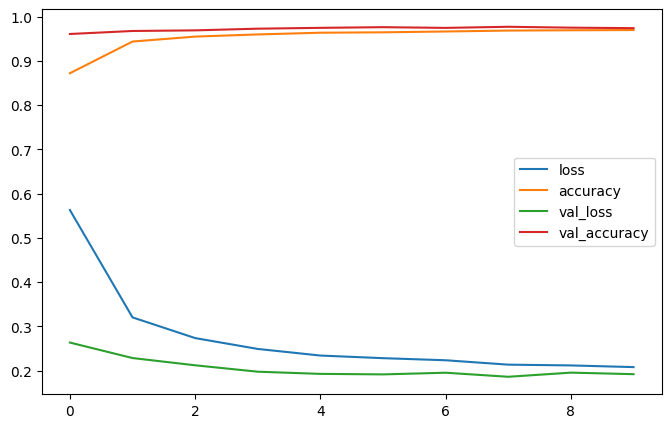

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))